In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np

## 1.

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

## 2.

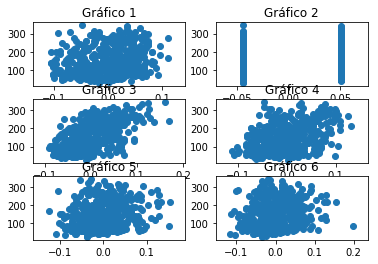

In [3]:
plt.subplot(321)
plt.scatter(X[0:,0], y)
plt.title("Gráfico 1")

plt.subplot(322)
plt.scatter(X[0:,1], y)
plt.title("Gráfico 2")

plt.subplot(323)
plt.scatter(X[0:,2], y)
plt.title("Gráfico 3")

plt.subplot(324)
plt.scatter(X[0:,3], y)
plt.title("Gráfico 4")

plt.subplot(325)
plt.scatter(X[0:,4], y)
plt.title("Gráfico 5")

plt.subplot(326)
plt.scatter(X[0:,5], y)
plt.title("Gráfico 6")


plt.show()

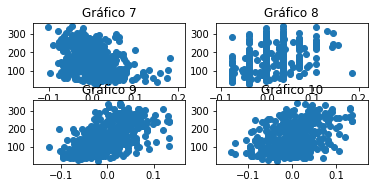

In [4]:
plt.subplot(321)
plt.scatter(X[0:,6], y)
plt.title("Gráfico 7")

plt.subplot(322)
plt.scatter(X[0:,7], y)
plt.title("Gráfico 8")

plt.subplot(323)
plt.scatter(X[0:,8], y)
plt.title("Gráfico 9")

plt.subplot(324)
plt.scatter(X[0:,9], y)
plt.title("Gráfico 10")


plt.show()

### a. O gráfico que possui uma maior semelhança com uma função do primeiro grau é o gráfico 3, pois é semelhante a uma reta crescente. 
### b. O menos semelhante é o gráfico 2, pois todos os pontos em y, estão concentrados em 2 pontos em X, com isso a imagem da função é referente a 2 pontos do dominio, não caracterizando uma função.



## 3.

In [5]:
correlacao = []
for i in range(10):
    correlacao.append(np.correlate(X[0:,i],y))
print(correlacao)

[array([ 304.18307453]), array([ 69.71535568]), array([ 949.43526038]), array([ 714.7416437]), array([ 343.25445189]), array([ 281.78459335]), array([-639.14527932]), array([ 696.88303009]), array([ 916.13872282]), array([ 619.22282068])]


#### A coluna na posição 2(cerca de 949), ou seja, o gráfico 3 contem as features com maior correlação.
#### E a coluna na posição 1 (cerca de 69), ou seja, o gráfico 2 contem as features com menor correlação.

## 4.

In [6]:
modelo = linear_model.LinearRegression()
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 5. A formula foi expressa no código

In [7]:
print(modelo.intercept_, end="")
a =1
for i in modelo.coef_:
    print(' + ({})X{}'.format(i,a), end="")
    a+= 1
    



152.133484163 + (-10.01219781747031)X1 + (-239.81908936565546)X2 + (519.8397867901342)X3 + (324.390427689376)X4 + (-792.1841616283069)X5 + (476.74583782366346)X6 + (101.04457032134512)X7 + (177.0641762322504)X8 + (751.2793210873954)X9 + (67.62538639104413)X10

## 6.

In [8]:
y_pred = modelo.predict(X)

## 7.

In [9]:
mse = metrics.mean_squared_error(y,y_pred)
print("Método:",mse)
mse2 = sum((y - y_pred)**2)/len(y)
print("Manual:",mse2)

Método: 2859.69039877
Manual: 2859.69039877


## 8.

In [10]:
#Grafico 3 = coluna 2 da matriz
x = X[0:,2]
xmelhor = [ [i] for i in x]
ymelhor = [ [i] for i in y]
B1 = np.sum(((xmelhor- np.mean(xmelhor))*(ymelhor-np.mean(ymelhor))))/ np.sum((xmelhor- np.mean(xmelhor))**2)
B0 = np.mean(ymelhor) - B1*np.mean(xmelhor)
print ('                            Coeficientes manuais')
print ('Coeficiente 0 =',B0,'--- Coeficiente 1 =',B1)


                            Coeficientes manuais
Coeficiente 0 = 152.133484163 --- Coeficiente 1 = 949.435260384


In [11]:
modeloMelhor = linear_model.LinearRegression()
modeloMelhor.fit(xmelhor,y)
print ('                            Coeficientes automáticos')
print ('Coeficiente 0 =',modeloMelhor.intercept_,'--- Coeficiente 1 =',modeloMelhor.coef_)
y_pred = modeloMelhor.predict(xmelhor)

                            Coeficientes automáticos
Coeficiente 0 = 152.133484163 --- Coeficiente 1 = [ 949.43526038]


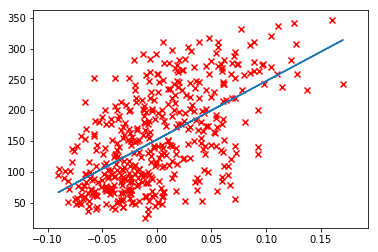

In [12]:
plt.scatter(xmelhor,ymelhor, color='red', marker='x')
plt.plot(xmelhor,y_pred)

In [13]:
mseM = metrics.mean_squared_error(ymelhor,y_pred)
print(mseM)

3890.45658546


## 9.

In [14]:
x = X[0:,1]
xpior = [ [i] for i in x]
yp = [ [i] for i in y]
modeloPior = linear_model.LinearRegression()
modeloPior.fit(xpior,yp)
print ('                            Coeficientes automáticos')
print ('Coeficiente 0 =',modeloPior.intercept_,'--- Coeficiente 1 =',modeloPior.coef_)
y_pred = modeloPior.predict(xpior)

                            Coeficientes automáticos
Coeficiente 0 = [ 152.13348416] --- Coeficiente 1 = [[ 69.71535568]]


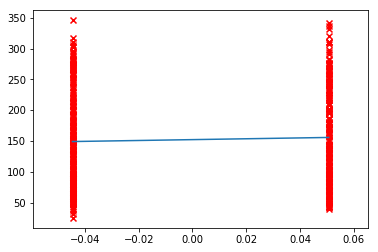

In [15]:
plt.scatter(xpior,y, color='red', marker='x')
plt.plot(xpior,y_pred)

In [16]:
mseP = metrics.mean_squared_error(y,y_pred)
print(mseP)

5918.88889959
